In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# 한글
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

save_flag = False # save visualized result

In [41]:
# 데이터 취합하기
forders = os.listdir('data/공공자전거 이용정보(월별)/')
df_all = pd.DataFrame()
for i in range(0,len(forders)):
    if forders[i].split('.')[1] == 'csv':
        file = "data/공공자전거 이용정보(월별)/"+forders[i]
        df= pd.read_csv(file, encoding='utf-8')
        df_all = pd.concat([df_all, df])

C:\Users\h\AppData\Local\Temp\ipykernel_30164\3298221679.py:7: DtypeWarning: Columns (1,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(file, encoding='utf-8')


In [42]:
YEARS = ['2017', '2018', '2019', '2020', '2021','2022']
MONTHS = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
ENG_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def count_total_monthly_volume():
    count_list, record_date_list = [], []
    for year in YEARS:
        path = 'data/공공자전거 이용정보(월별)/서울특별시 공공자전거 이용정보(월별)_' + str(year) + '.csv'
        df = pd.read_csv(path)
        print('Counting year {}'.format(year))

        ## 연도별 다른 포멧으로 공개된 데이터 파싱
        for i in range(len(MONTHS)):
            if year == '2022':
                if i > 5: ## 현재 2022년 6월까지 공개
                    break
                year_month = '{}-{}'.format(2022,MONTHS[i])
                
            elif year == '2021':
                year_month = '{}-{}'.format(2021,MONTHS[i])
            elif year == '2020':
                year_month = '{}-{}'.format(2020,MONTHS[i])
            elif year == '2019':
                year_month = '{}-{}'.format(2019,MONTHS[i])
            elif year == '2018':
                year_month = '{}-{}'.format(2018,MONTHS[i])
            elif year == '2017':
                year_month = '{}-{}'.format(2017,MONTHS[i])
            
            count_list.append(df[df['대여일자'] == year_month]['이용건수'].sum())
            record_date_list.append(year + "-" + MONTHS[i])
    return count_list, record_date_list

def tabularize_total_monthly_volume(count_by_ten_hundreds_list, record_date_list):
    df = pd.DataFrame({'년-월': record_date_list, '이용자수(만명)': count_by_ten_hundreds_list})
    df['year'] = df['년-월'].apply(lambda x: x.split('-')[0])
    df['month'] = df['년-월'].apply(lambda x: x.split('-')[1])
    return df


count_list, record_date_list = count_total_monthly_volume()
count_by_ten_hundreds_list = [c / 1e4 for c in count_list] ## 가독성을 위해 만 단위로 나눔
total_monthly_volume_df = tabularize_total_monthly_volume(count_by_ten_hundreds_list, record_date_list)

Counting year 2017


C:\Users\h\AppData\Local\Temp\ipykernel_30164\252311517.py:9: DtypeWarning: Columns (1,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Counting year 2018
Counting year 2019
Counting year 2020
Counting year 2021
Counting year 2022


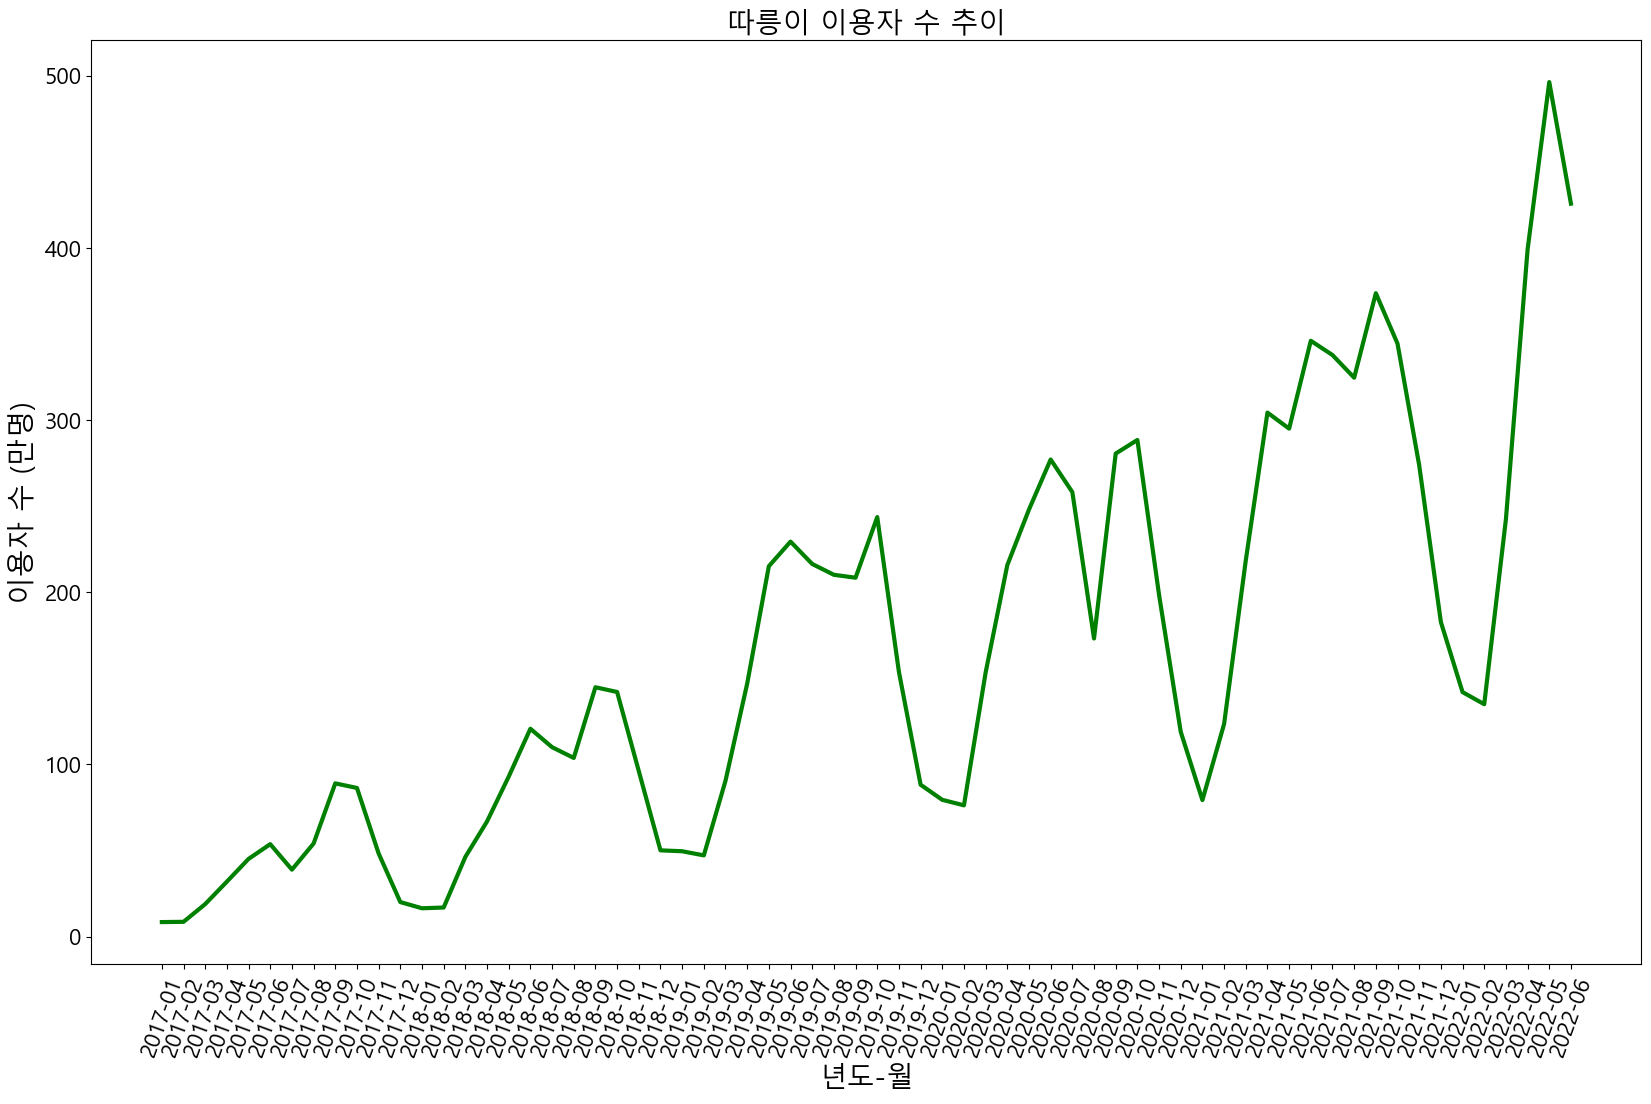

In [43]:
# 전체 이용자 수
plt.figure(figsize=(20, 12), facecolor='white')
plt.xlabel('년도-월', fontsize=20)
plt.ylabel('이용자 수 (만명)', fontsize=20)
plt.xticks(fontsize = 16, rotation = 70)
plt.yticks(fontsize = 16)
plt.title('따릉이 이용자 수 추이', fontsize=20)
plt.plot(record_date_list, count_by_ten_hundreds_list, color = 'green', linewidth = 3)
plt.show()

In [94]:
def graph1():
    fig = plt.figure(figsize=(20, 12), facecolor='white')
    ax = fig.add_subplot(111)
    ax.set_xlabel('년도-월', fontsize=20)
    ax.set_ylabel('이용자 수 (만명)', fontsize=20)

    plt.plot(record_date_list, count_by_ten_hundreds_list, color = 'green', linewidth = 3)
    ax.set_xticklabels(record_date_list, rotation=70)
    return fig

C:\Users\h\AppData\Local\Temp\ipykernel_30164\3594974229.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(record_date_list, rotation=70)
C:\Users\h\AppData\Local\Temp\ipykernel_30164\351100340.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


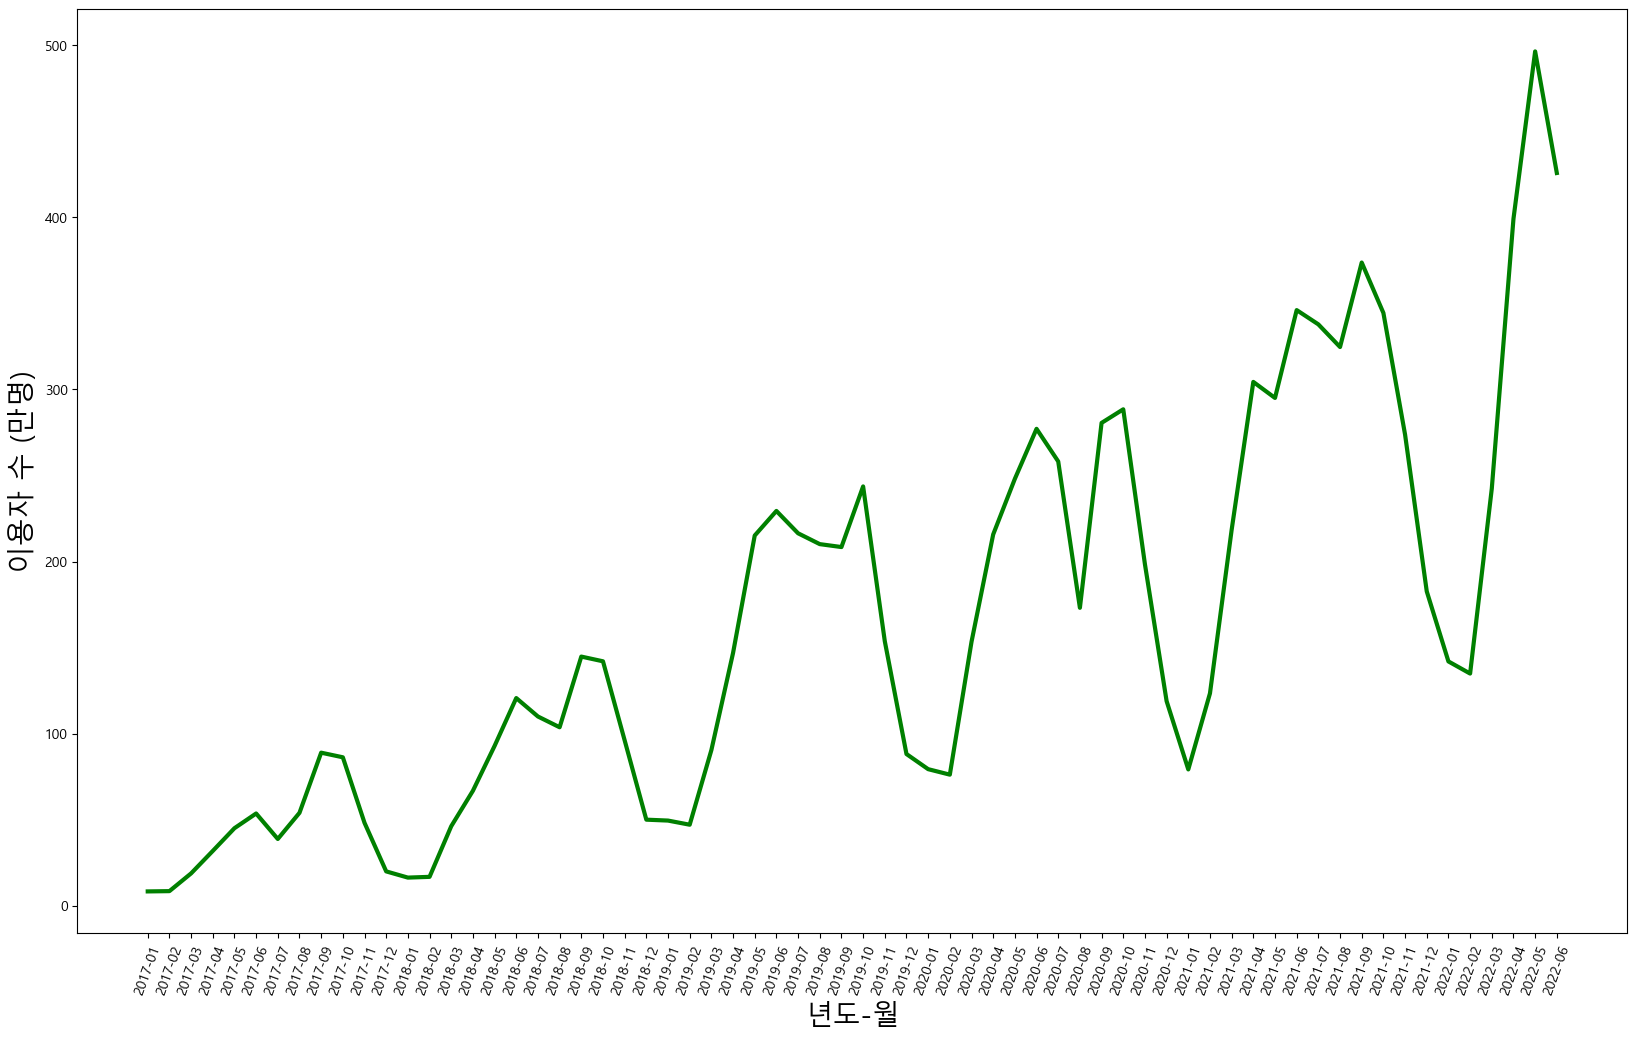

In [95]:
fig = graph1()
fig.show()

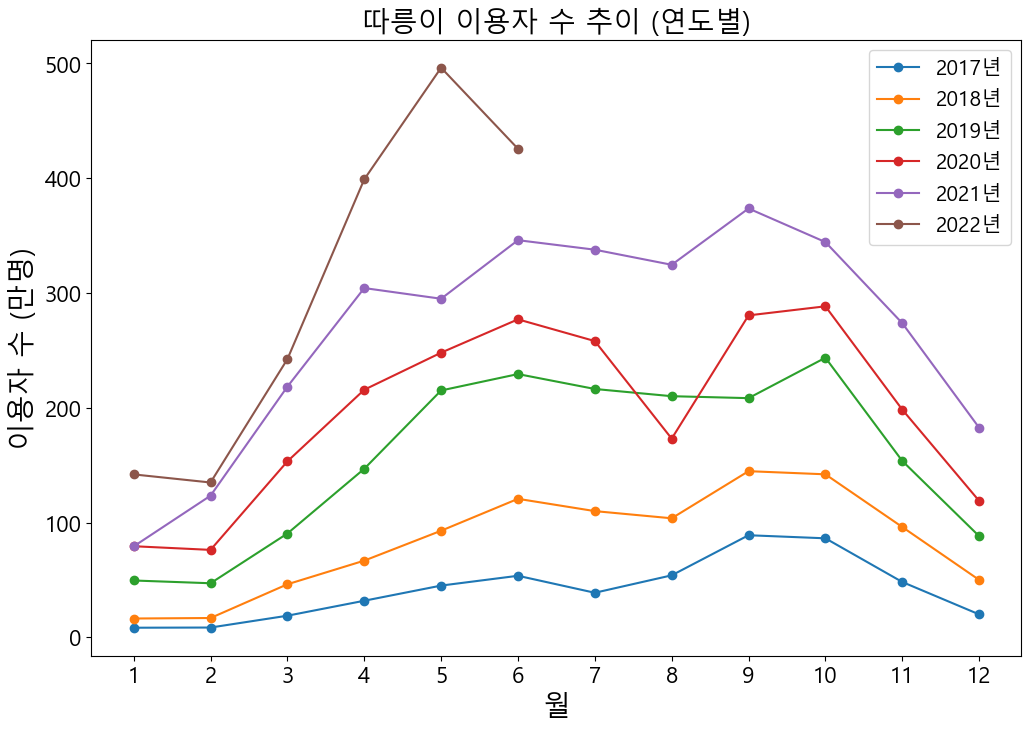

In [44]:
# 따릉이 이용자 수 (연도별)
plt.figure(figsize=(12, 8), facecolor='white')
plt.xlabel('월', fontsize = 20)
plt.ylabel('이용자 수 (만명)', fontsize = 20)
plt.xticks(list(range(1, len(MONTHS)+1)), fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('따릉이 이용자 수 추이 (연도별)', fontsize = 20)
for year in YEARS:
    tgt_rows = total_monthly_volume_df[total_monthly_volume_df['year'] == year]
    plt.plot(tgt_rows['month'].astype(int), tgt_rows['이용자수(만명)'], label='{}년'.format(year), marker='o')
plt.legend(prop={'size': 15})
plt.show()

In [108]:
def graph2():
    fig = plt.figure(figsize=(12,8),facecolor='white')
    ax = fig.add_subplot(111)
    ax.set_xlabel('월', fontsize = 20)
    ax.set_ylabel('이용자 수 (만명)', fontsize=20)
    for year in YEARS:
        tgt_rows = total_monthly_volume_df[total_monthly_volume_df['year'] == year]
        plt.plot(tgt_rows['month'].astype(int), tgt_rows['이용자수(만명)'], label='{}년'.format(year), marker='o')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax.legend(prop={'size':15})
    return fig

C:\Users\h\AppData\Local\Temp\ipykernel_30164\1540212683.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


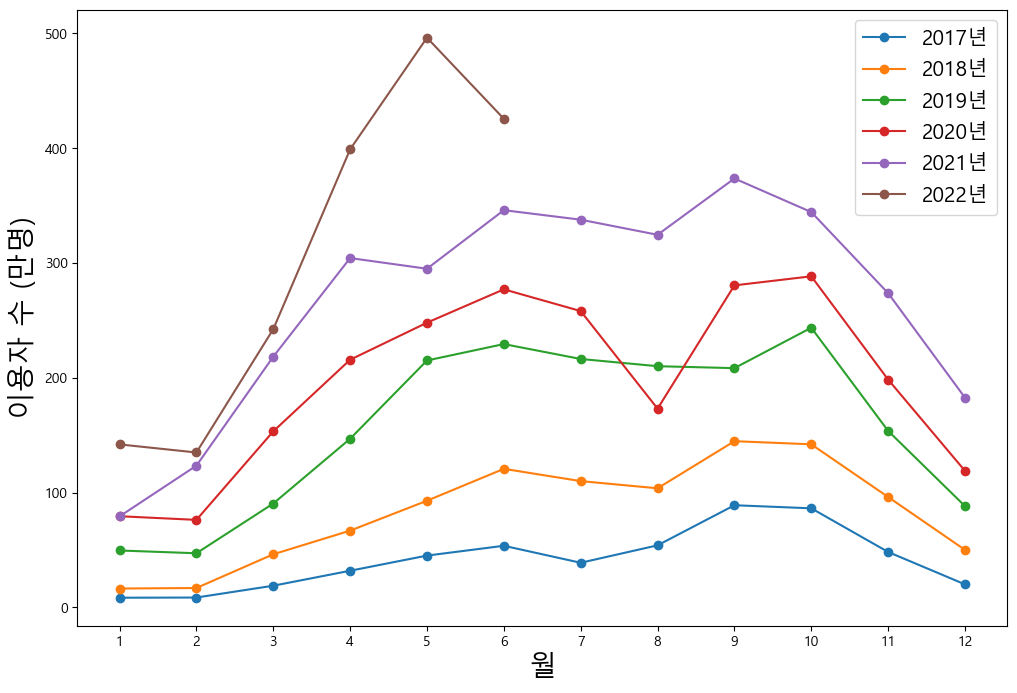

In [109]:
fig = graph2()
fig.show()

In [22]:
new_user_age_df_raw = pd.read_csv('data/신규가입자 정보(월별)/연령별_전처리.csv')

In [23]:
new_user_age_df = new_user_age_df_raw.fillna(0)
new_user_age_df['datetime'] = new_user_age_df['날짜'].apply(lambda x: datetime.strptime(x, '%y-%b'))
new_user_age_df['year'] = new_user_age_df['datetime'].apply(lambda x: x.year)
new_user_age_df['month'] = new_user_age_df['datetime'].apply(lambda x: x.month)
new_user_age_df

,날짜,10대,20대,30대,40대,50대,60대,70대,기타,datetime,year,month
0,17-Jan,204,1716,760,472,180,46,14,0.0,2017-01-01,2017,1
1,17-Feb,365,2741,1137,616,220,41,28,0.0,2017-02-01,2017,2
2,17-Mar,727,9523,3871,2135,702,163,498,0.0,2017-03-01,2017,3
3,17-Apr,1409,20809,8473,3761,1219,256,94,0.0,2017-04-01,2017,4
4,17-May,2321,27635,11563,5425,1986,445,197,0.0,2017-05-01,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...
61,22-Feb,3327,6811,3266,2301,1365,480,61,76.0,2022-02-01,2022,2
62,22-Mar,6052,17082,8176,5593,2974,955,159,199.0,2022-03-01,2022,3
63,22-Apr,10941,38556,21022,12564,6181,1900,315,430.0,2022-04-01,2022,4
64,22-May,15738,38819,21090,13331,6943,2021,358,486.0,2022-05-01,2022,5


In [24]:
tgt_ages = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '기타']
new_user_by_month_cumsum = new_user_age_df[tgt_ages].cumsum().sum(axis=1)
new_user_by_month = new_user_age_df[tgt_ages].sum(axis=1)
datetime_str = new_user_age_df['datetime'].apply(lambda x: x.strftime('%Y-%m'))

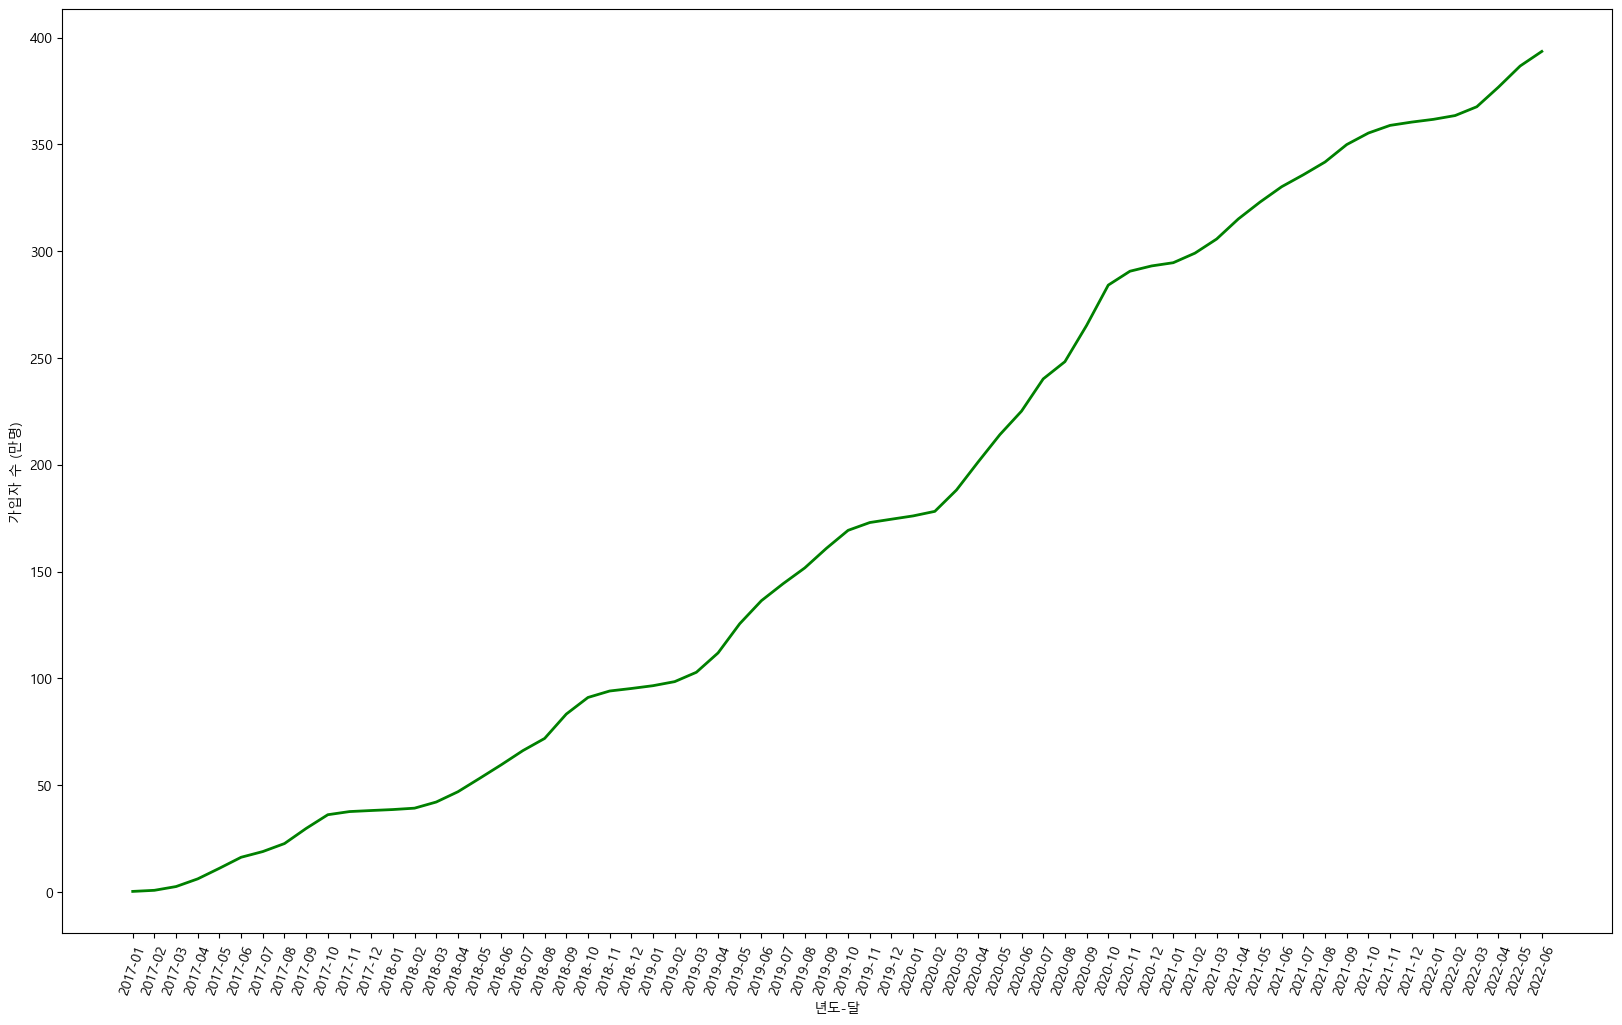

In [110]:
## 신규 가입자 누적
plt.figure(figsize=(20, 12))
plt.plot(datetime_str, new_user_by_month_cumsum / 1e4,color = 'green', linewidth = 2)
plt.xticks(rotation=70)
plt.xlabel("년도-달")
plt.ylabel("가입자 수 (만명)")
plt.show()

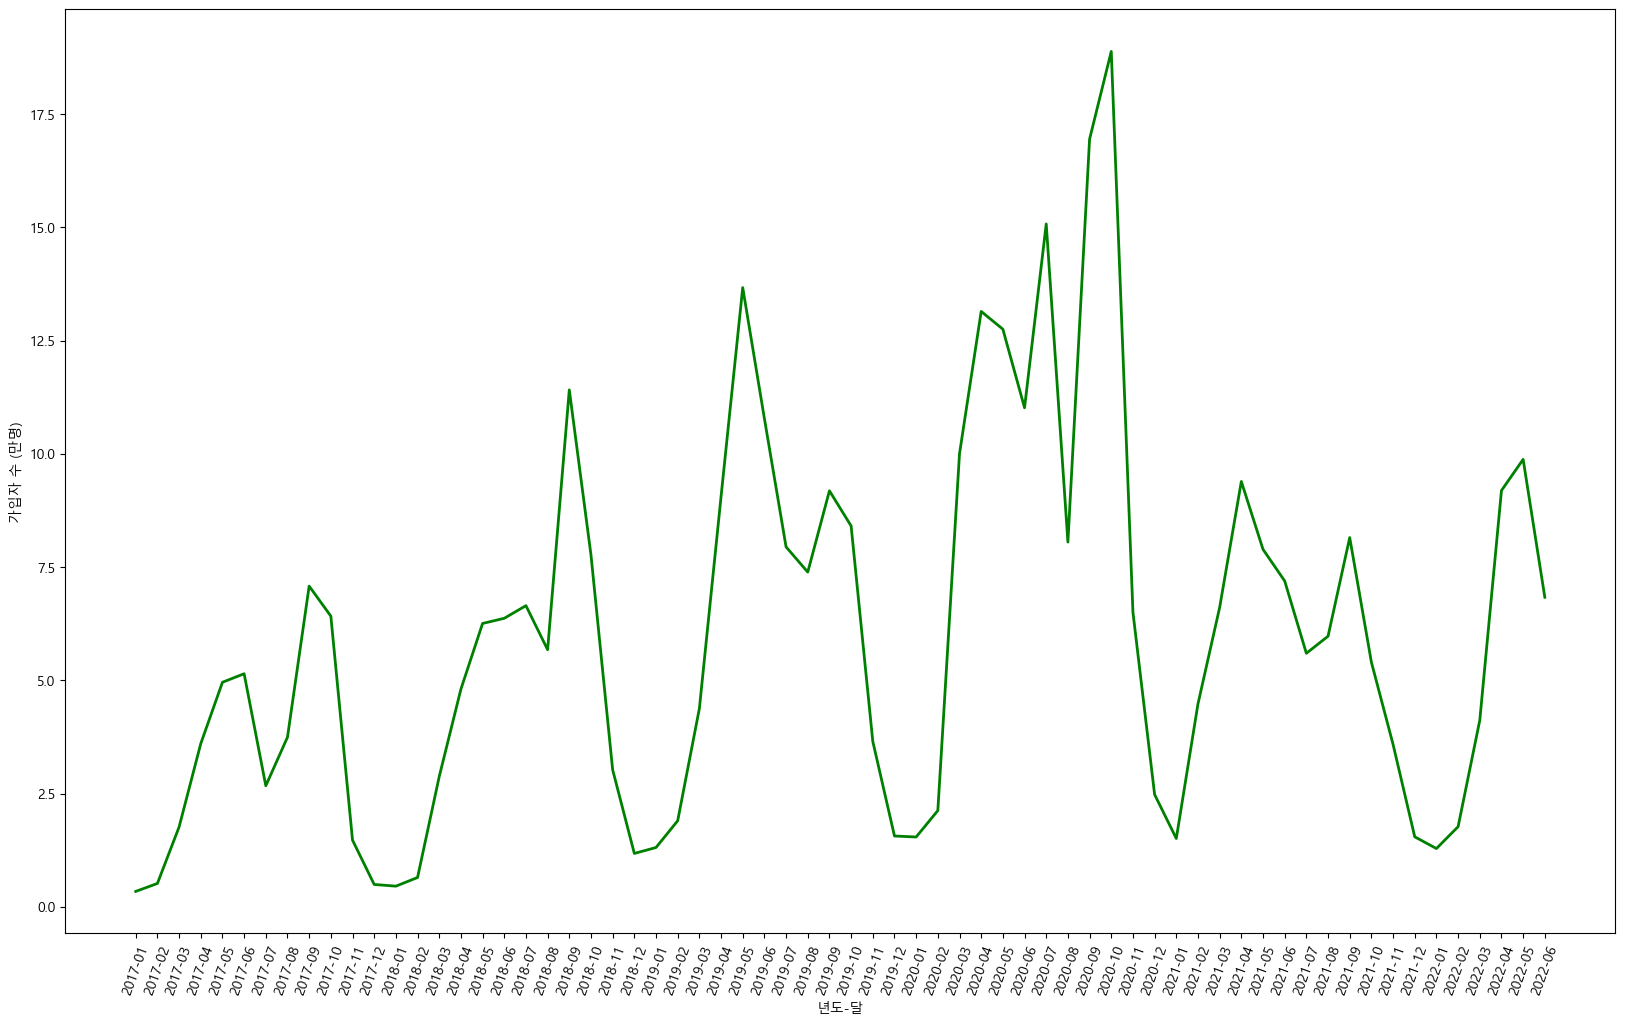

In [111]:
## 신규 가입자 추이
plt.figure(figsize=(20,12))
plt.plot(datetime_str, new_user_by_month / 1e4,color = 'green', linewidth = 2)
plt.xticks(rotation=70)
plt.xlabel("년도-달")
plt.ylabel("가입자 수 (만명)")
plt.show()

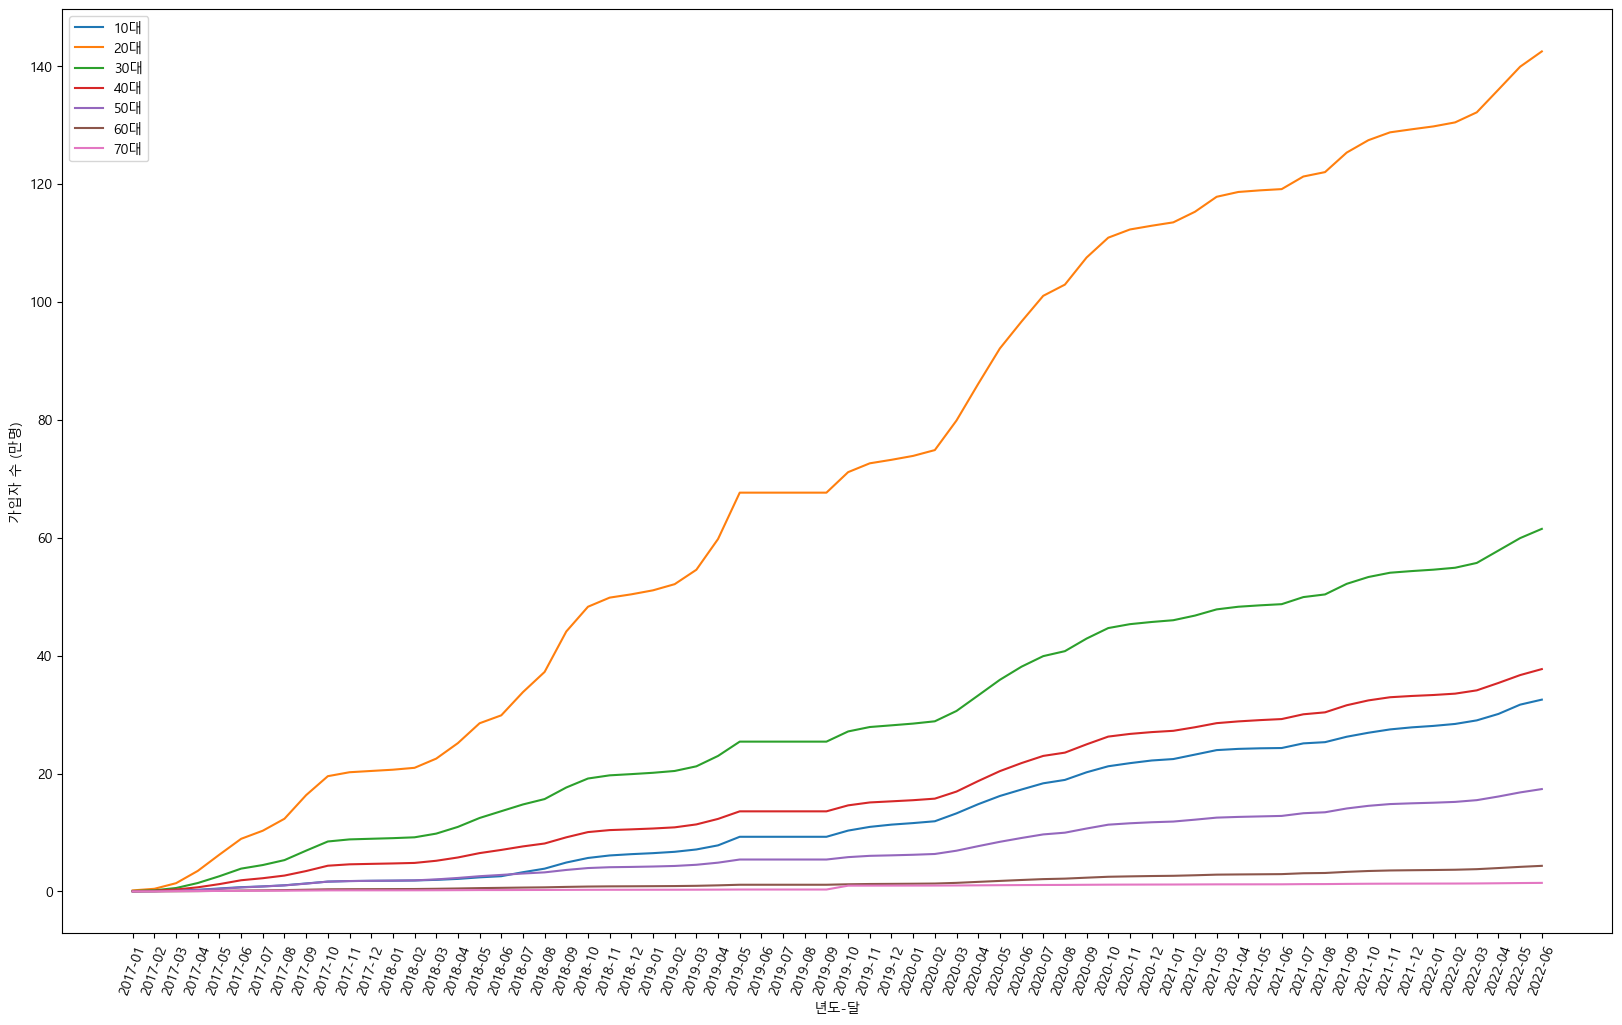

In [112]:
## 연령대별 가입자 누적 계산
tgt_ages = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']
datetime_str = new_user_age_df['datetime'].apply(lambda x: x.strftime('%Y-%m'))
df_cumsum_age = new_user_age_df[tgt_ages].cumsum()
fig = plt.figure(figsize=(20,12))
for tgt_age in tgt_ages:
    ys = df_cumsum_age[tgt_age].values / 1e4
    plt.plot(datetime_str, ys, label=tgt_age)
plt.xticks(rotation=70)
plt.xlabel("년도-달")
plt.ylabel("가입자 수 (만명)")
plt.legend()
plt.show(fig)